In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_log_error, median_absolute_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# load happiness_regions data
happiness_regions = pd.read_csv("regions.txt",index_col=0,names=['area code', 'region', 'latitude', 'longitude'])

# view happiness_regions data
happiness_regions

,region,latitude,longitude
area code,,,
E12000001,NORTH EAST,55.0,-1.9
E12000002,NORTH WEST,54.0,-2.6
E12000003,YORKSHIRE AND THE HUMBER,53.6,-1.2
E12000004,EAST MIDLANDS,53.0,-0.8
E12000005,WEST MIDLANDS,52.5,-2.3
E12000006,EAST,52.2,0.4
E12000007,LONDON,51.5,-0.1
E12000008,SOUTH EAST,51.3,-0.5
E12000009,SOUTH WEST,51.0,-3.2


In [3]:
# load happiness_local data
happiness_local = pd.read_excel("./happiness_data/happiness_data_geo_2014_2015.xls", sheet_name='Happiness', 
                          names=['area codes','area names','average rating'],index_col=0, 
                          usecols=[0,1,8], skiprows=7, nrows=439)

# view happiness_local data
happiness_local

,area names,average rating
area codes,,
E12000001,NORTH EAST,7.34
E06000047,NaN,7.37
E06000005,NaN,7.46
E06000001,NaN,7.48
E06000002,NaN,7.28
...,...,...
N09000007,NaN,7.69
N09000008,NaN,8.03
N09000009,NaN,7.91


In [4]:
# parse average rating from happiness_local data and join into happiness_regions data to complete the dataset
happiness_regions['average rating'] = 0.0
for area_code in happiness_regions.index:
    happiness_regions.at[area_code,'average rating'] = happiness_local.loc[area_code][1]

# view completed happiness_regions data
happiness_regions

,region,latitude,longitude,average rating
area code,,,,
E12000001,NORTH EAST,55.0,-1.9,7.34
E12000002,NORTH WEST,54.0,-2.6,7.39
E12000003,YORKSHIRE AND THE HUMBER,53.6,-1.2,7.41
E12000004,EAST MIDLANDS,53.0,-0.8,7.51
E12000005,WEST MIDLANDS,52.5,-2.3,7.43
E12000006,EAST,52.2,0.4,7.51
E12000007,LONDON,51.5,-0.1,7.38
E12000008,SOUTH EAST,51.3,-0.5,7.54
E12000009,SOUTH WEST,51.0,-3.2,7.50


In [5]:
# load dictionary of previously processed data of all stations (i.e. stations_dict)
with open("./weather_data/stations_dict.pkl", "rb") as f:
    stations_dict = pickle.load(f)

# view stations_dict
stations_dict

{'aberporth':         0   1     2    3    4      5     6            7
 0    1941   1   NaN  NaN  NaN   74.7   NaN          NaN
 1    1941   2   NaN  NaN  NaN   69.1   NaN          NaN
 2    1941   3   NaN  NaN  NaN   76.2   NaN          NaN
 3    1941   4   NaN  NaN  NaN   33.7   NaN          NaN
 4    1941   5   NaN  NaN  NaN   51.3   NaN          NaN
 ..    ...  ..   ...  ...  ...    ...   ...          ...
 958  2020  11  11.7  6.8  0.0   70.8  55.6  Provisional
 959  2020  12   8.6  4.6  0.0  190.4  25.3  Provisional
 960  2021   1   6.9  2.8  7.0  138.0  38.0  Provisional
 961  2021   2   7.9  2.9  6.0  119.4  60.6  Provisional
 962  2021   3   9.8  4.6  3.0   38.8  94.7  Provisional
 
 [963 rows x 8 columns],
 'armagh':          0   1     2    3     4      5     6            7
 0     1853   1   NaN  NaN   NaN   57.3   NaN          NaN
 1     1853   2   NaN  NaN   NaN   32.3   NaN          NaN
 2     1853   3   NaN  NaN   NaN   65.5   NaN          NaN
 3     1853   4   NaN  NaN   N

In [6]:
# create new dataframe with rows for all stations and fill with percentiles of numeric values
stations_percentiles = pd.DataFrame(index=stations_dict.keys(), 
                  columns=["90thP tmax (degC)", "10thP tmin (degC)", "90thP af (days)", "90thP rain (mm)", 
                           "90thP sun (hours)"])

In [7]:
# compute and fill in whole stations_percentiles dataframe
for station in stations_dict.keys():
    stations_percentiles.loc[station][0] = np.nanpercentile(stations_dict[station].iloc[:,2],90)
    stations_percentiles.loc[station][1] = np.nanpercentile(stations_dict[station].iloc[:,3],10)
    stations_percentiles.loc[station][2] = np.nanpercentile(stations_dict[station].iloc[:,4],90)
    stations_percentiles.loc[station][3] = np.nanpercentile(stations_dict[station].iloc[:,5],90)
    stations_percentiles.loc[station][4] = np.nanpercentile(stations_dict[station].iloc[:,6],90)

# view filled stations_percentiles dataframe
stations_percentiles

,90thP tmax (degC),10thP tmin (degC),90thP af (days),90thP rain (mm),90thP sun (hours)
aberporth,17.76,2.7,5,136.4,217.16
armagh,19.1,1.2,10,112.4,172
ballypatrick,16.6,1.5,8,183.64,190.23
bradford,18.9,0.7,12,130.88,182.44
braemar,17.18,-2.3,20,128.85,180.09
camborne,18.5,4.2,3,165.2,226.58
cambridge,21.8,1.16,11,80.96,206.7
cardiff,21.18,2.1,9,176.24,212.2
chivenor,20.2,3.1,6,127.34,225.86
cwmystwyth,17.6,0.4,14.2,252.49,171.62


In [8]:
# add latitude and longitude columns to dataframe
stations_percentiles['lat'] = ''
stations_percentiles['long'] = ''

In [9]:
# fetch latitude and longitude data from text data files of stations
for station in stations_percentiles.index:
    with open("./weather_data/" + station + "data.txt") as f:
        lines = f.readlines(300)
    if "Lat" in lines[1]:
        stations_percentiles.at[station,'lat'] = lines[1][lines[1].index("Lat")+4:lines[1].index("Lat")+10]
        stations_percentiles.at[station,'long'] = lines[1][lines[1].index("Lat")+15:lines[1].index("Lat")+21]
    elif "Lat" in lines[2]:
        stations_percentiles.at[station,'lat'] = lines[2][lines[2].index("Lat")+4:lines[2].index("Lat")+10]
        stations_percentiles.at[station,'long'] = lines[2][lines[2].index("Lat")+15:lines[2].index("Lat")+21]

# remove commas from the end of longitude strings if they exist
for station in stations_percentiles.index:
    if stations_percentiles.at[station,'long'][-1] == ',':
        stations_percentiles.at[station,'long'] = stations_percentiles.at[station,'long'][:-1]

# convert latitude and longitude values to floats
stations_percentiles['lat'] = np.array(stations_percentiles['lat']).astype(np.float)
stations_percentiles['long'] = np.array(stations_percentiles['long']).astype(np.float)

# view updated dataframe
stations_percentiles

,90thP tmax (degC),10thP tmin (degC),90thP af (days),90thP rain (mm),90thP sun (hours),lat,long
aberporth,17.76,2.7,5,136.4,217.16,52.139,-4.570
armagh,19.1,1.2,10,112.4,172,54.352,-6.649
ballypatrick,16.6,1.5,8,183.64,190.23,55.181,-6.153
bradford,18.9,0.7,12,130.88,182.44,53.813,-1.772
braemar,17.18,-2.3,20,128.85,180.09,57.006,-3.396
camborne,18.5,4.2,3,165.2,226.58,50.218,-5.327
cambridge,21.8,1.16,11,80.96,206.7,52.245,0.102
cardiff,21.18,2.1,9,176.24,212.2,51.488,-3.187
chivenor,20.2,3.1,6,127.34,225.86,51.089,-4.147
cwmystwyth,17.6,0.4,14.2,252.49,171.62,52.358,-3.802


In [10]:
# add region and average rating columns to dataframe
stations_percentiles['region'] = ''
stations_percentiles['average rating'] = 0.0

In [11]:
# find the closest region to a weather station from the happiness_regions data and use the region's happiness
# rating for the happiness rating of the station
for station in stations_percentiles.index:
    tuple1 = (stations_percentiles.loc[station]['lat'],stations_percentiles.loc[station]['long'])
    dist_series = pd.Series(dtype='float64')
    for area_code in happiness_regions.index:
        tuple2 = (happiness_regions.loc[area_code]['latitude'],happiness_regions.loc[area_code]['longitude'])
        distance = np.linalg.norm(np.array(tuple1) - np.array(tuple2))
        dist_temp = pd.Series([distance], index=[area_code])
        dist_series = dist_series.append(dist_temp)
    i = dist_series[dist_series == dist_series.min()].index[0]
    stations_percentiles.at[station,'region'] = happiness_regions.loc[i]['region']
    stations_percentiles.at[station,'average rating'] = happiness_regions.loc[i]['average rating']

# view updated stations_percentiles dataset
stations_percentiles

,90thP tmax (degC),10thP tmin (degC),90thP af (days),90thP rain (mm),90thP sun (hours),lat,long,region,average rating
aberporth,17.76,2.7,5,136.4,217.16,52.139,-4.570,WALES,7.44
armagh,19.1,1.2,10,112.4,172,54.352,-6.649,NORTHERN IRELAND,7.75
ballypatrick,16.6,1.5,8,183.64,190.23,55.181,-6.153,NORTHERN IRELAND,7.75
bradford,18.9,0.7,12,130.88,182.44,53.813,-1.772,YORKSHIRE AND THE HUMBER,7.41
braemar,17.18,-2.3,20,128.85,180.09,57.006,-3.396,SCOTLAND,7.45
camborne,18.5,4.2,3,165.2,226.58,50.218,-5.327,SOUTH WEST,7.50
cambridge,21.8,1.16,11,80.96,206.7,52.245,0.102,EAST,7.51
cardiff,21.18,2.1,9,176.24,212.2,51.488,-3.187,WALES,7.44
chivenor,20.2,3.1,6,127.34,225.86,51.089,-4.147,SOUTH WEST,7.50
cwmystwyth,17.6,0.4,14.2,252.49,171.62,52.358,-3.802,WALES,7.44


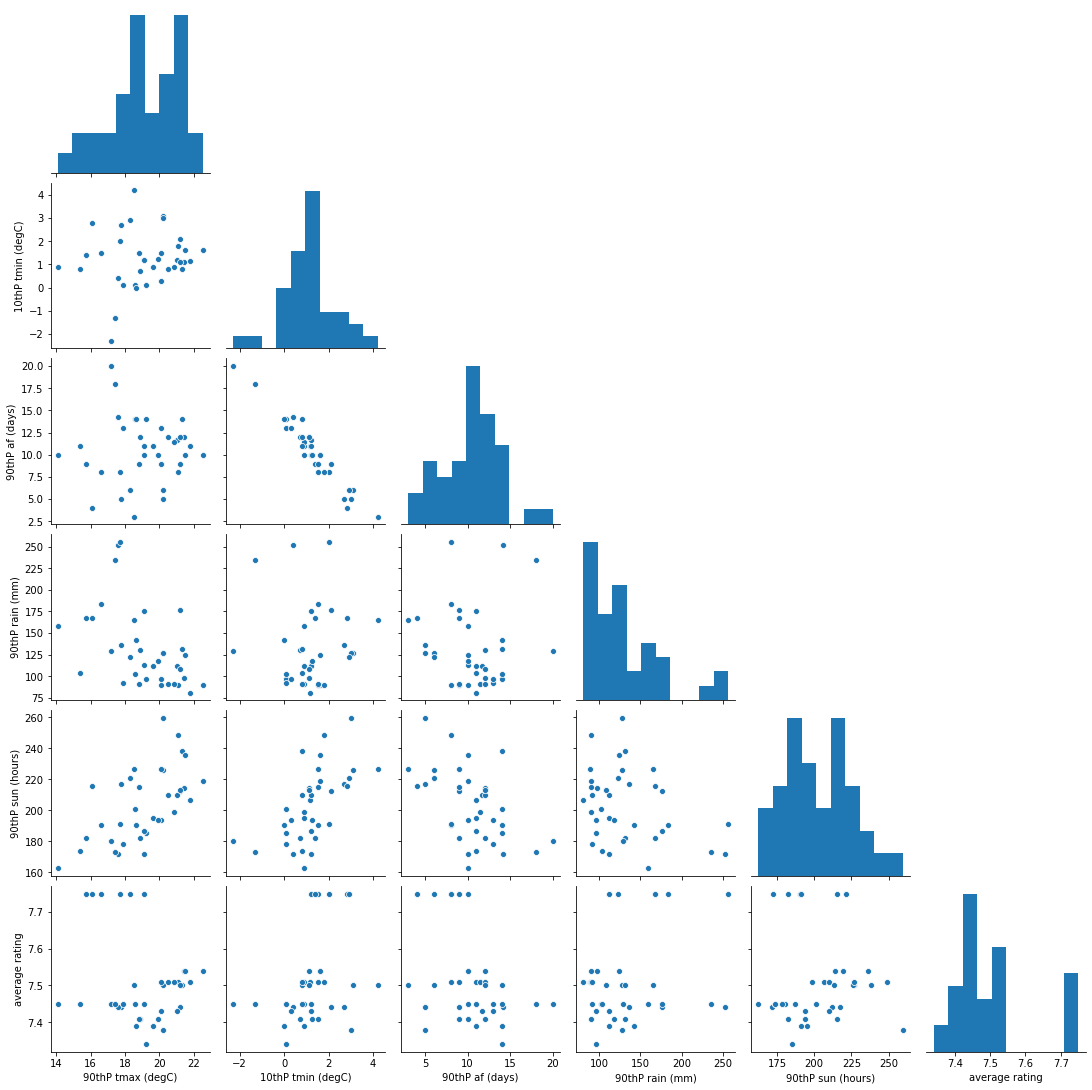

In [12]:
# visualize weather and happiness data
sns.pairplot(stations_percentiles, vars=['90thP tmax (degC)', '10thP tmin (degC)', '90thP af (days)', 
                                         '90thP rain (mm)', '90thP sun (hours)', 'average rating'], corner=True)

In [13]:
# convert object columns of stations_percentiles dataframe to float64 for calculating summary statistics
for column in stations_percentiles.columns[0:5]:
    stations_percentiles[column] = pd.to_numeric(stations_percentiles[column])

# show summary statistics
stations_percentiles.describe()

,90thP tmax (degC),10thP tmin (degC),90thP af (days),90thP rain (mm),90thP sun (hours),lat,long,average rating
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,19.108108,1.218919,10.494595,131.919730,203.192162,53.781324,-2.721378,7.506216
std,1.988784,1.202081,3.584066,45.212829,23.226093,2.522246,2.156905,0.118494
min,14.100000,-2.300000,3.000000,80.960000,162.500000,50.218000,-6.880000,7.340000
25%,17.760000,0.800000,9.000000,96.460000,185.140000,51.761000,-4.147000,7.440000
50%,19.100000,1.200000,11.000000,122.440000,200.900000,53.252000,-2.663000,7.450000
75%,20.840000,1.600000,12.000000,158.510000,217.160000,55.311000,-1.262000,7.510000
max,22.500000,4.200000,20.000000,255.700000,259.820000,60.139000,1.727000,7.750000


In [14]:
# show pairwise correlation of columns
stations_percentiles.corr()

,90thP tmax (degC),10thP tmin (degC),90thP af (days),90thP rain (mm),90thP sun (hours),lat,long,average rating
90thP tmax (degC),1.000000,0.129883,0.033077,-0.480689,0.605850,-0.822510,0.551240,-0.235529
10thP tmin (degC),0.129883,1.000000,-0.966255,0.029972,0.604021,-0.424052,-0.153987,0.336722
90thP af (days),0.033077,-0.966255,1.000000,-0.024803,-0.515838,0.253196,0.193703,-0.393800
90thP rain (mm),-0.480689,0.029972,-0.024803,1.000000,-0.319809,0.221872,-0.552530,0.265545
90thP sun (hours),0.605850,0.604021,-0.515838,-0.319809,1.000000,-0.737388,0.395112,0.003509
lat,-0.822510,-0.424052,0.253196,0.221872,-0.737388,1.000000,-0.356615,0.175796
long,0.551240,-0.153987,0.193703,-0.552530,0.395112,-0.356615,1.000000,-0.564297
average rating,-0.235529,0.336722,-0.393800,0.265545,0.003509,0.175796,-0.564297,1.000000


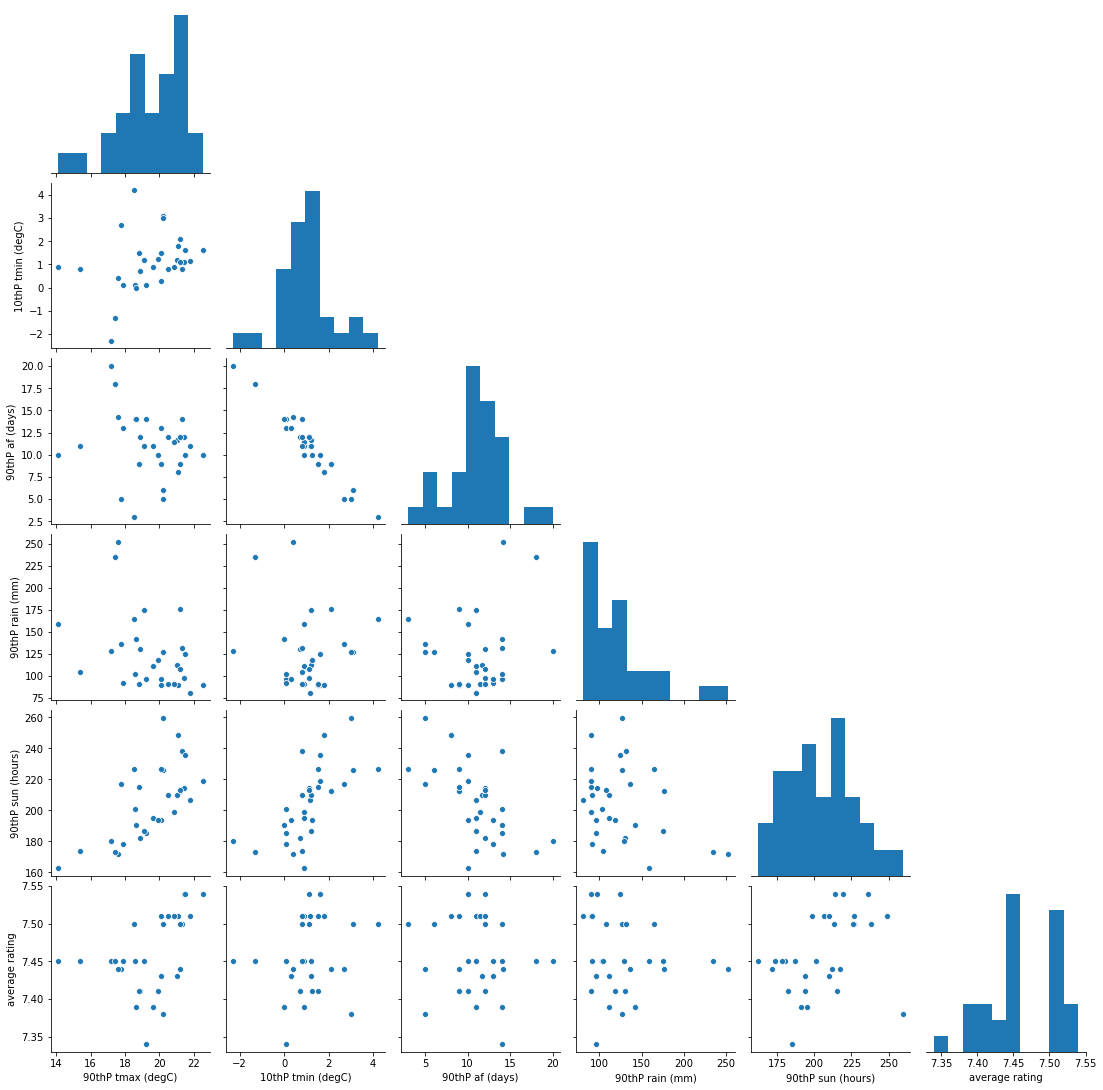

In [15]:
# remove stations in Northern Ireland (i.e. outliers) from the stations_percentiles data
stations_reduced = stations_percentiles[stations_percentiles['region']!='NORTHERN IRELAND']

# create new pairplot of weather and happiness data
sns.pairplot(stations_reduced, vars=['90thP tmax (degC)', '10thP tmin (degC)', '90thP af (days)', 
                                         '90thP rain (mm)', '90thP sun (hours)', 'average rating'], corner=True)

In [16]:
# show updated summary statistics of columns
stations_reduced.describe()

,90thP tmax (degC),10thP tmin (degC),90thP af (days),90thP rain (mm),90thP sun (hours),lat,long,average rating
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,19.467419,1.074194,11.074194,124.921935,204.715161,53.418032,-2.087645,7.459032
std,1.904948,1.229126,3.534211,41.281754,23.901285,2.504654,1.702192,0.051598
min,14.100000,-2.300000,3.000000,80.960000,162.500000,50.218000,-5.327000,7.340000
25%,18.550000,0.550000,9.500000,93.990000,186.040000,51.483500,-3.196500,7.430000
50%,19.900000,1.100000,11.000000,111.940000,206.700000,52.794000,-2.279000,7.450000
75%,21.050000,1.550000,13.000000,133.800000,218.130000,54.719000,-1.216500,7.505000
max,22.500000,4.200000,20.000000,252.490000,259.820000,60.139000,1.727000,7.540000


In [17]:
# show updated pairwise correlation of columns
stations_reduced.corr()

,90thP tmax (degC),10thP tmin (degC),90thP af (days),90thP rain (mm),90thP sun (hours),lat,long,average rating
90thP tmax (degC),1.000000,0.303590,-0.178186,-0.405350,0.673889,-0.799217,0.405075,0.421474
10thP tmin (degC),0.303590,1.000000,-0.970925,-0.085737,0.658919,-0.591129,0.028014,0.221393
90thP af (days),-0.178186,-0.970925,1.000000,0.148071,-0.600738,0.456633,-0.084762,-0.144911
90thP rain (mm),-0.405350,-0.085737,0.148071,1.000000,-0.327574,0.059175,-0.526147,-0.186299
90thP sun (hours),0.673889,0.658919,-0.600738,-0.327574,1.000000,-0.779446,0.401738,0.380702
lat,-0.799217,-0.591129,0.456633,0.059175,-0.779446,1.000000,-0.172923,-0.357342
long,0.405075,0.028014,-0.084762,-0.526147,0.401738,-0.172923,1.000000,0.198961
average rating,0.421474,0.221393,-0.144911,-0.186299,0.380702,-0.357342,0.198961,1.000000


======== model ======== 

coefficient: 
 [[0.0114162]]
intercept: 
 [7.23678825]


======== metrics ========

mean squared error: 0.00211880
R squared: 0.17764045
mean squared log error: 0.00002972
mean absolute error: 0.03855797
median absolute error: 0.03858343
max error: 0.11597934
explained variance score: 0.17764045


======== plot ========



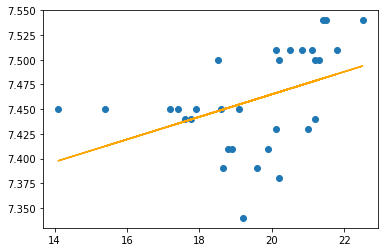

In [18]:
# perform linear regression of happiness on tmax

# train model
tmax_happiness = LinearRegression().fit(stations_reduced.iloc[:,0:1],stations_reduced.iloc[:,8:9])
print("======== model ======== \n")
print("coefficient: \n", tmax_happiness.coef_)
print("intercept: \n", tmax_happiness.intercept_)

# predict
y_true = stations_reduced['average rating'].to_numpy()
y_pred = tmax_happiness.predict(stations_reduced.iloc[:,0:1])

# show model's metrics
print("\n\n======== metrics ========\n")
print('mean squared error: %.8f' % mean_squared_error(y_true, y_pred))
print('R squared: %.8f' % r2_score(y_true, y_pred))
print('mean squared log error: %.8f' % mean_squared_log_error(y_true, y_pred))
print('mean absolute error: %.8f' % mean_absolute_error(y_true, y_pred))
print('median absolute error: %.8f' % median_absolute_error(y_true, y_pred))
print('max error: %.8f' % max_error(y_true, y_pred))
print('explained variance score: %.8f' % explained_variance_score(y_true, y_pred))

# show scatterplot and linear fit
print("\n\n======== plot ========\n")
plt.scatter(stations_reduced.iloc[:,0:1],stations_reduced.iloc[:,8:9])
plt.plot(stations_reduced.iloc[:,0:1], y_pred, color='orange')

======== model ======== 

coefficient: 
 [[0.00082186]]
intercept: 
 [7.29078505]


======== metrics ========

mean squared error: 0.00220306
R squared: 0.14493409
mean squared log error: 0.00003085
mean absolute error: 0.03795346
median absolute error: 0.03072519
max error: 0.12432072
explained variance score: 0.14493409


======== plot ========



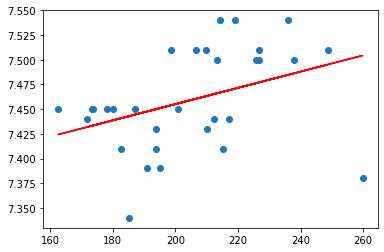

In [19]:
# perform linear regression of happiness on sun

# train model
sun_happiness = LinearRegression().fit(stations_reduced.iloc[:,4:5],stations_reduced.iloc[:,8:9])
print("======== model ======== \n")
print("coefficient: \n", sun_happiness.coef_)
print("intercept: \n", sun_happiness.intercept_)

# predict
y_true = stations_reduced['average rating'].to_numpy()
y_pred = sun_happiness.predict(stations_reduced.iloc[:,4:5])

# show model's metrics
print("\n\n======== metrics ========\n")
print('mean squared error: %.8f' % mean_squared_error(y_true, y_pred))
print('R squared: %.8f' % r2_score(y_true, y_pred))
print('mean squared log error: %.8f' % mean_squared_log_error(y_true, y_pred))
print('mean absolute error: %.8f' % mean_absolute_error(y_true, y_pred))
print('median absolute error: %.8f' % median_absolute_error(y_true, y_pred))
print('max error: %.8f' % max_error(y_true, y_pred))
print('explained variance score: %.8f' % explained_variance_score(y_true, y_pred))

# show scatterplot and linear fit
print("\n\n======== plot ========\n")
plt.scatter(stations_reduced.iloc[:,4:5],stations_reduced.iloc[:,8:9])
plt.plot(stations_reduced.iloc[:,4:5], y_pred, color='red')

======== model ======== 

coefficient: 
 [[0.01056985 0.00432069]]
intercept: 
 [7.24862336]


======== metrics ========

mean squared error: 0.00209402
R squared: 0.18725739
mean squared log error: 0.00002937
mean absolute error: 0.03905756
median absolute error: 0.03768759
max error: 0.11199649
explained variance score: 0.18725739


======== plot ========



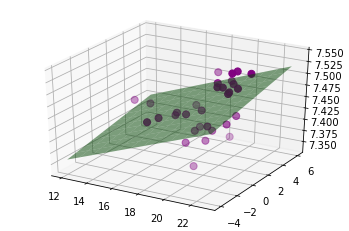

In [20]:
# perform linear regression of happiness on (tmax, tmin)

# train model
tmax_tmin_happiness = LinearRegression().fit(stations_reduced.iloc[:,0:2],stations_reduced.iloc[:,8:9])
print("======== model ======== \n")
print("coefficient: \n", tmax_tmin_happiness.coef_)
print("intercept: \n", tmax_tmin_happiness.intercept_)

# predict
y_true = stations_reduced['average rating'].to_numpy()
y_pred = tmax_tmin_happiness.predict(stations_reduced.iloc[:,0:2])

# show model's metrics
print("\n\n======== metrics ========\n")
print('mean squared error: %.8f' % mean_squared_error(y_true, y_pred))
print('R squared: %.8f' % r2_score(y_true, y_pred))
print('mean squared log error: %.8f' % mean_squared_log_error(y_true, y_pred))
print('mean absolute error: %.8f' % mean_absolute_error(y_true, y_pred))
print('median absolute error: %.8f' % median_absolute_error(y_true, y_pred))
print('max error: %.8f' % max_error(y_true, y_pred))
print('explained variance score: %.8f' % explained_variance_score(y_true, y_pred))

# show 3D surface plot
print("\n\n======== plot ========\n")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stations_reduced['90thP tmax (degC)'], stations_reduced['10thP tmin (degC)'], 
           stations_reduced['average rating'], c='purple', s=50)
# create a grid of values in the tmax (p1) and tmin (p2) directions to help us draw a plane
p1, p2 = np.mgrid[12:24, -4:7]
a=tmax_tmin_happiness.coef_[0][0]
b=tmax_tmin_happiness.coef_[0][1]
c=tmax_tmin_happiness.intercept_[0]
plane = a*p1 + b*p2 + c
ax.plot_surface(p1,p2,plane,color='green',alpha=0.5)
plt.show()